#  PHYSICAL MODELS OF LIVING SYSTEMS


## Homework - week 11 & 12


Author: Nguyen Xuan Tung

Id: 2005491
    

----------------------------------------------------------------------------------------------------------------------

Simulate option 1 or 2

1. Choose one of the examples on feedback loop (can be either negative positive) and simulate it. Try to combine two feedback loop (or simulating the genetic network shown in class or creating one yourself), simulate it and describe in few sentences the results of the simulations (like “what’s going on” in the simulation).

2. Simulate the stochastic dynamics of the two stage model.

----------------------------------------------------------------------------------------------------------------------

Run the given code

In [21]:
import numpy as np
import matplotlib.pyplot as plt

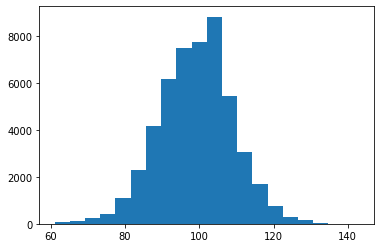

In [30]:
TMAX = 1.e5

k1 = 0.01
k2 = 1.

def evolve_gillespie(A, t):
	# reaction 1: A -> 0
	a1 = k1*A
	# reaction 2: 0 -> A
	a2 = k2
	
	# total rate
	a0 = a1+a2
	
	# choose dt for the next reaction
	dt = np.random.exponential(1./a0)
	t = t+dt
	
	# choose which reaction is next:
	if(np.random.rand() < a1/a0): # reaction 1
		A = A-1
	else:	# reaction 2
		A = A+1
	
	return [A, t]

# timeseries
ts_A = []
ts_t = []

# initial state	
A = 0
t = 0.

while t<TMAX:
	ts_A.append(A)
	ts_t.append(t)
	
	[A, t] = evolve_gillespie(A, t)

# list of time steps
ts_dt = np.array(ts_t[1:])-np.array(ts_t[:-1]) # note that this list has 1 element less (we don't know for how long the last state stays)

# histogram
points = len(ts_A)
plt.hist(ts_A[points//2:-1], weights=ts_dt[points//2:], bins=20, label="histogram")
plt.show()

----------------------------------------------------------------------------------------------------------------------

## 2. Simulate the stochastic dynamics of the two stage model

### Genetic Toggle Switch Model

$G_1, G_2$: 2 genes 

$P_1, P_2$: 2 types of protein

- $G_1$ produces $P_1$, $G_2$ produces $P_2$
- Each gene represses the other gene's expression / protein production
> *Each protein can bind particular DNA sites upstream of the gene which codes for the other protein, thereby repressing its transcription.*


### Stochastic model

$X_1(t), X_2(t)$: number of proteins of type 1 & type 2 at time $t$
##### 4 reactions with propensities

\begin{align}
\text{production } P_1 \quad &\mathcal{R}_1: \emptyset \to P_1 &\alpha_1(\mathbf{x}) &= \frac{a_1}{1 + (x_2/K_2)^{n_1}} \\
\text{degradation } P_1 \quad &\mathcal{R}_2: P_1 \to \emptyset &\alpha_2(\mathbf{x}) &= \gamma_1 x_1 \\
\text{production } P_2 \quad &\mathcal{R}_3: \emptyset \to P_2 &\alpha_3(\mathbf{x}) &= \frac{a_2}{1 + (x_1/K_1)^{n_2}} \\
\text{degradation } P_2 \quad &\mathcal{R}_4: P_2 \to \emptyset &\alpha_4(\mathbf{x}) &= \gamma_2 x_2 \\
\end{align}


##### Representation & Parameters
$\mathbf{x} = (x_1, x_2)^T$ 

$x_1, x_2$: number of proteins of type $P_1$ & $P_2$

**State-change vectors:** 

$\vec{\nu_1} = (1, 0)^T$ 
$\vec{\nu_2} = (-1, 0)^T$ 
$\vec{\nu_3} = (0, 1)^T$ 
$\vec{\nu_4} = (0, -1)^T$

**Parameter values** 

$a_1 = 155, a_2 = 30, n_1 = 3, n_2 = 1, K_1 = K_2 = 1, \gamma_1 = \gamma_2 = 1$


### Events & times 

- Keep track of events & times in arrays
- Initialize values for $t_0$, $X_1(t_0)$, $X_2(t_0)$


Each time an event happens,
- update time array: append the updated timepoint of the new event into the time array, t
- update protein number arrays: append the updated values for both of the protein variable arrays, P1 & P2

In [23]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

In [24]:
#Initialize time t = t_0, initial state choose time horizon
t = [0]
P1 = [155]
P2 = [30]

t_end = 1000 # end time of simulation

In [25]:
# Protein production - set parameters
a_1 = 15
K_1 = 1
n_1 = 3

a_2 = 30
K_2 = 1
n_2 = 3

In [26]:
# Protein degradation
gamma_1 = 1
gamma_2 = 1

In [27]:
while t[-1] < t_end:
    current_P1 = P1[-1]
    current_P2 = P2[-1]
    
    # STEP 2: Calculate alpha_k(x) for all k & their sum lambda(x)
    rates = [a_1 / (1 + (current_P2 / K_2)**n_1), \
             gamma_1 * current_P1, \
             a_2 / (1 + (current_P1 / K_1)**n_2), \
             gamma_2 * current_P2]

    rate_sum = sum(rates)

    # STEP 3: Generate & set tau & k*
    tau = np.random.exponential(scale=1/rate_sum) # scale represents the mean of the distribution
    t.append(t[-1] + tau)
    
    rand = random.uniform(0,1)

    # STEP 4: execute next reaction by replacing 
    
    # P1 production event
    if rand * rate_sum <= rates[0]:
            P1.append(P1[-1] + 1)
            P2.append(P2[-1])

    # P1 degradation event
    elif rand * rate_sum > rates[0] and rand * rate_sum <= sum(rates[:2]):
            P1.append(P1[-1] - 1)
            P2.append(P2[-1])

    # P2 production event
    elif rand * rate_sum > sum(rates[:2]) and rand * rate_sum <= sum(rates[:3]):
            P1.append(P1[-1])
            P2.append(P2[-1] + 1)

    # P2 degradation event
    elif rand * rate_sum > sum(rates[:3]) and rand * rate_sum <= sum(rates[:4]):
            P1.append(P1[-1])
            P2.append(P2[-1] - 1)

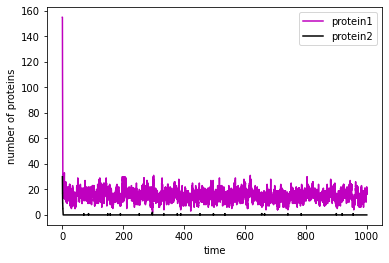

In [28]:
plt.plot(t , P1, color="m",label="protein1")
plt.plot(t , P2, color="k",label="protein2")
plt.ylabel('number of proteins')
plt.xlabel('time')
plt.legend()
plt.show()

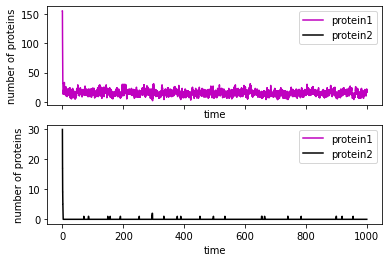

In [29]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
line1, = ax1.plot(t , P1, color="m",label="protein1")
line2, = ax2.plot(t , P2, color="k",label="protein2")
ax1.set_ylabel('number of proteins')
ax1.set_xlabel('time')
ax2.set_ylabel('number of proteins')
ax2.set_xlabel('time')
ax1.legend(handles=[line1,line2])
ax2.legend(handles=[line1,line2])
plt.show()

From the above two figures, we can see that the rate of protein rapidly decrease in the first milisecond, and after that it keeps fluctuating in a fixed range. 